# Hierarchical Clustering: HELP International

### Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the  recent funding programs, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use  this money strategically and effectively. The significant issues that come while making this decision are mostly related
to choosing the countries that are in the direst need of aid.

### Objectives:

- To mention the countries that are in direst need of aid on the basis of socio-economic and health factors determining the overall development of the country.
- Suggesting the countries to CEO at least 5 countries which are in direst need of aid from the analysis work that you perform.

# Importing Libraries

In [1]:
# Ignoring warnings.
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Reading Data and Data Preparation

In [3]:
# Loading the dataset
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Loading the data dictionary for better understanding of column names.
dict_data = pd.read_csv("data-dictionary.csv")
dict_data

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
# Information of 'country_data' dataset.
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Shape of dataset
country_data.shape

(167, 10)

In [7]:
# checking duplicates
country_data.duplicated(subset=["country"]).sum()

0

No duplicates found.

In [8]:
# Statistcal summary of "country_data"
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# checking null values
country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values. Hence imputation is not needed.

In [10]:
# Converting exports, imports and health spending percentages to their absolute values
country_data['exports'] = (country_data['exports']*country_data['gdpp'])/100
country_data['health'] = (country_data['health']*country_data['gdpp'])/100
country_data['imports'] = (country_data['imports']*country_data['gdpp'])/100

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = country_data.select_dtypes(include = ['object']).columns
num_col = country_data.select_dtypes(exclude = ['object']).columns

In [12]:
cat_col

Index(['country'], dtype='object')

In [13]:
num_col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

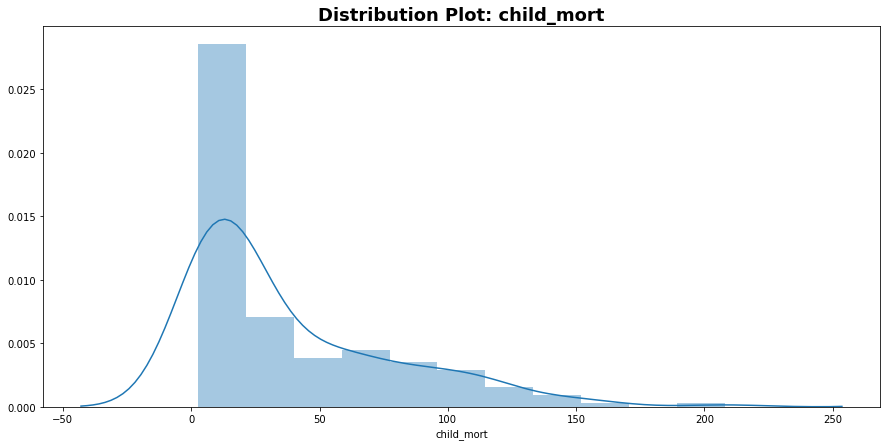

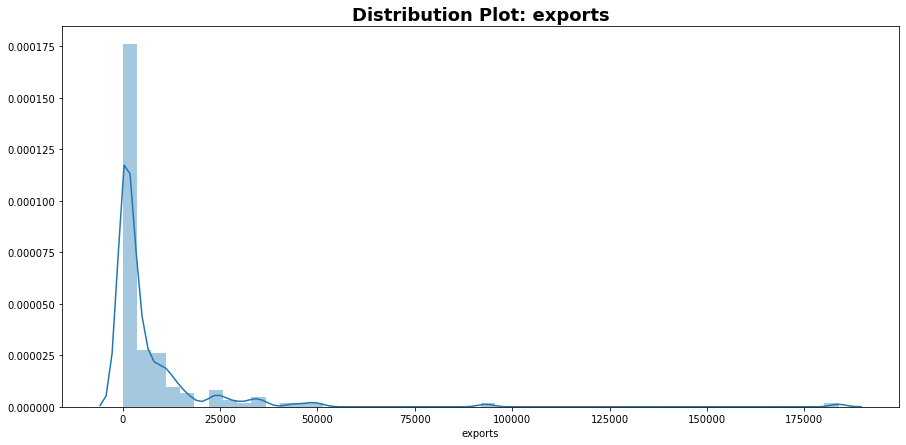

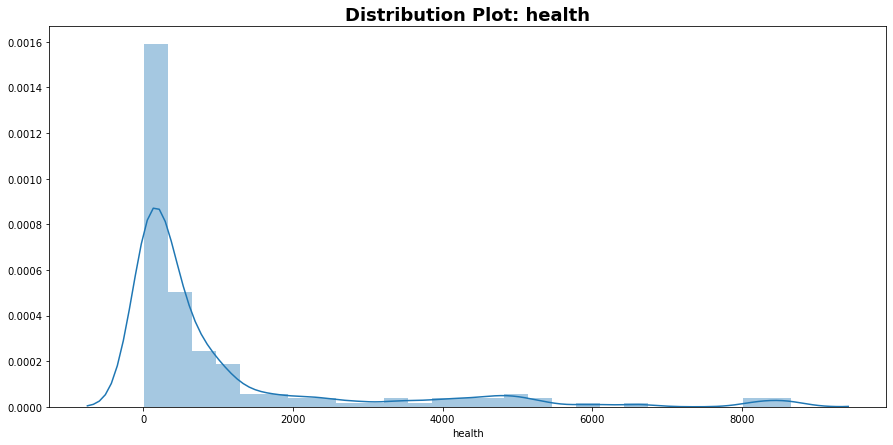

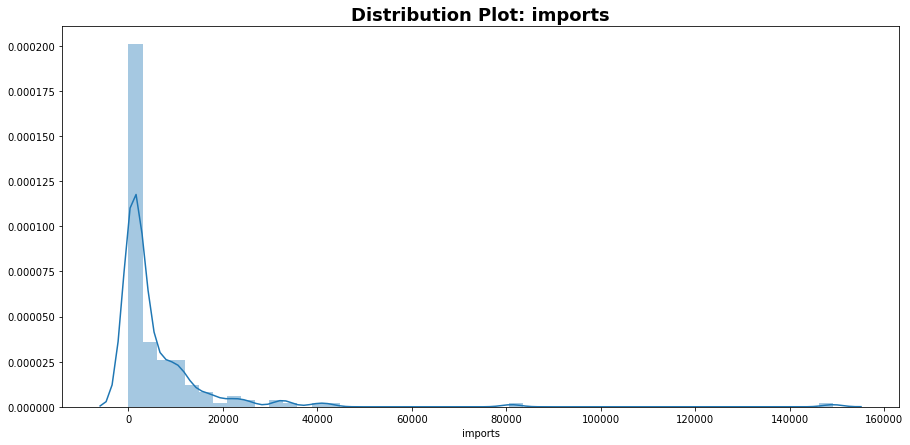

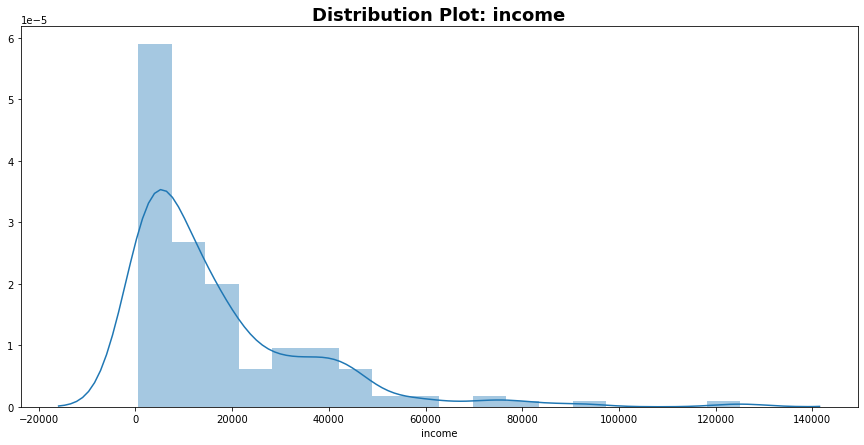

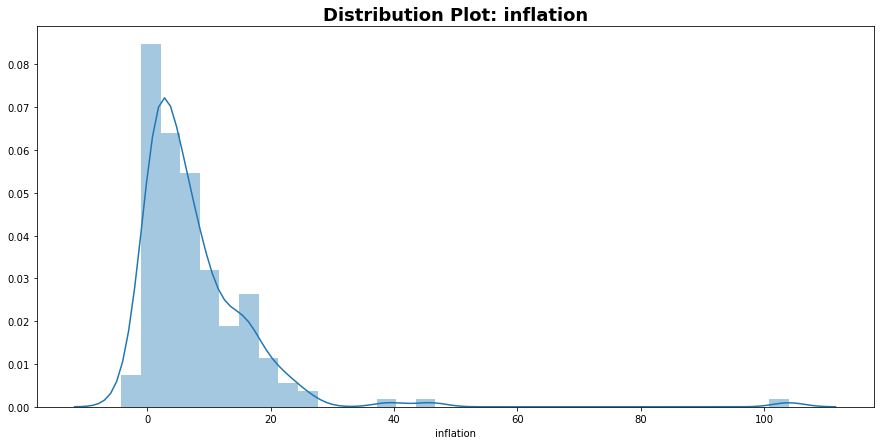

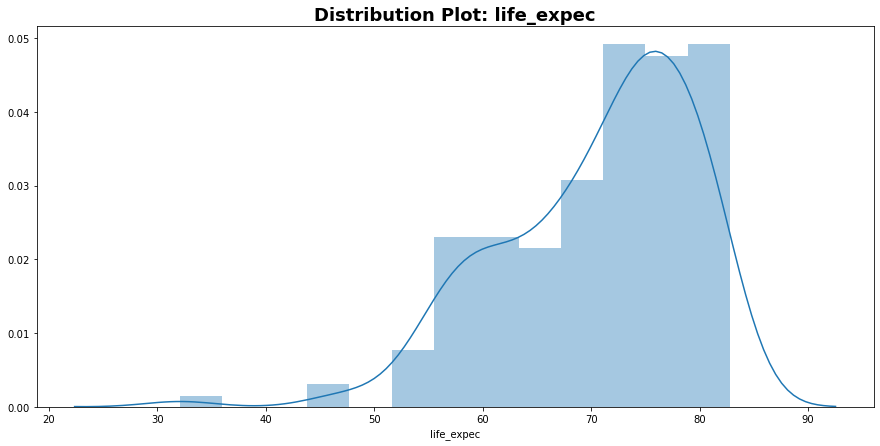

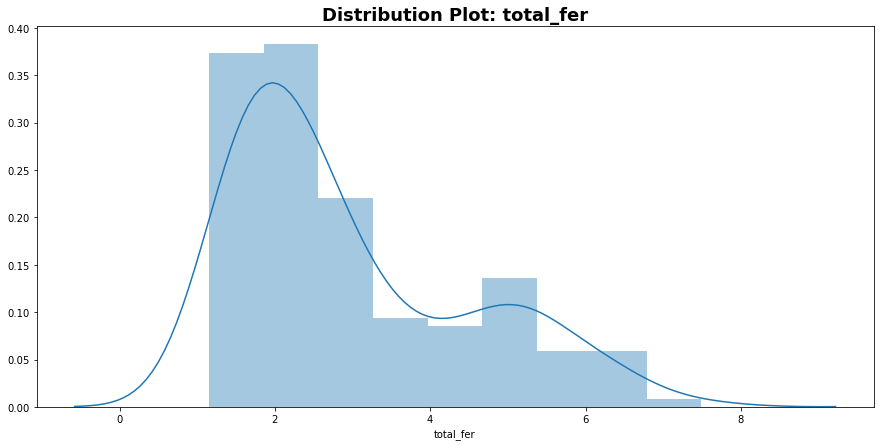

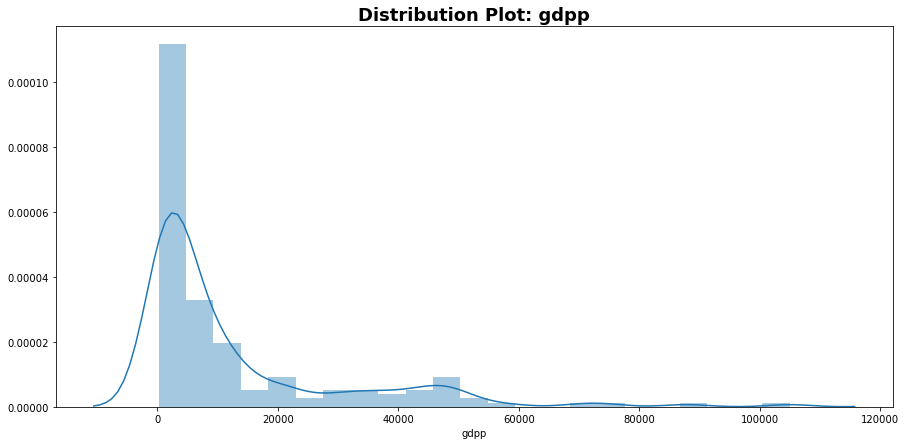

In [14]:
# Plotting distplot for all the numerical columns in dataset to better understand the distribution of data.

for c in num_col:
    plt.figure(figsize=(15,7))
    plt.title("Distribution Plot: %s" % c,fontsize=18, fontweight='bold')
    sns.distplot(country_data[c])
    plt.show();

# Outlier Treatment

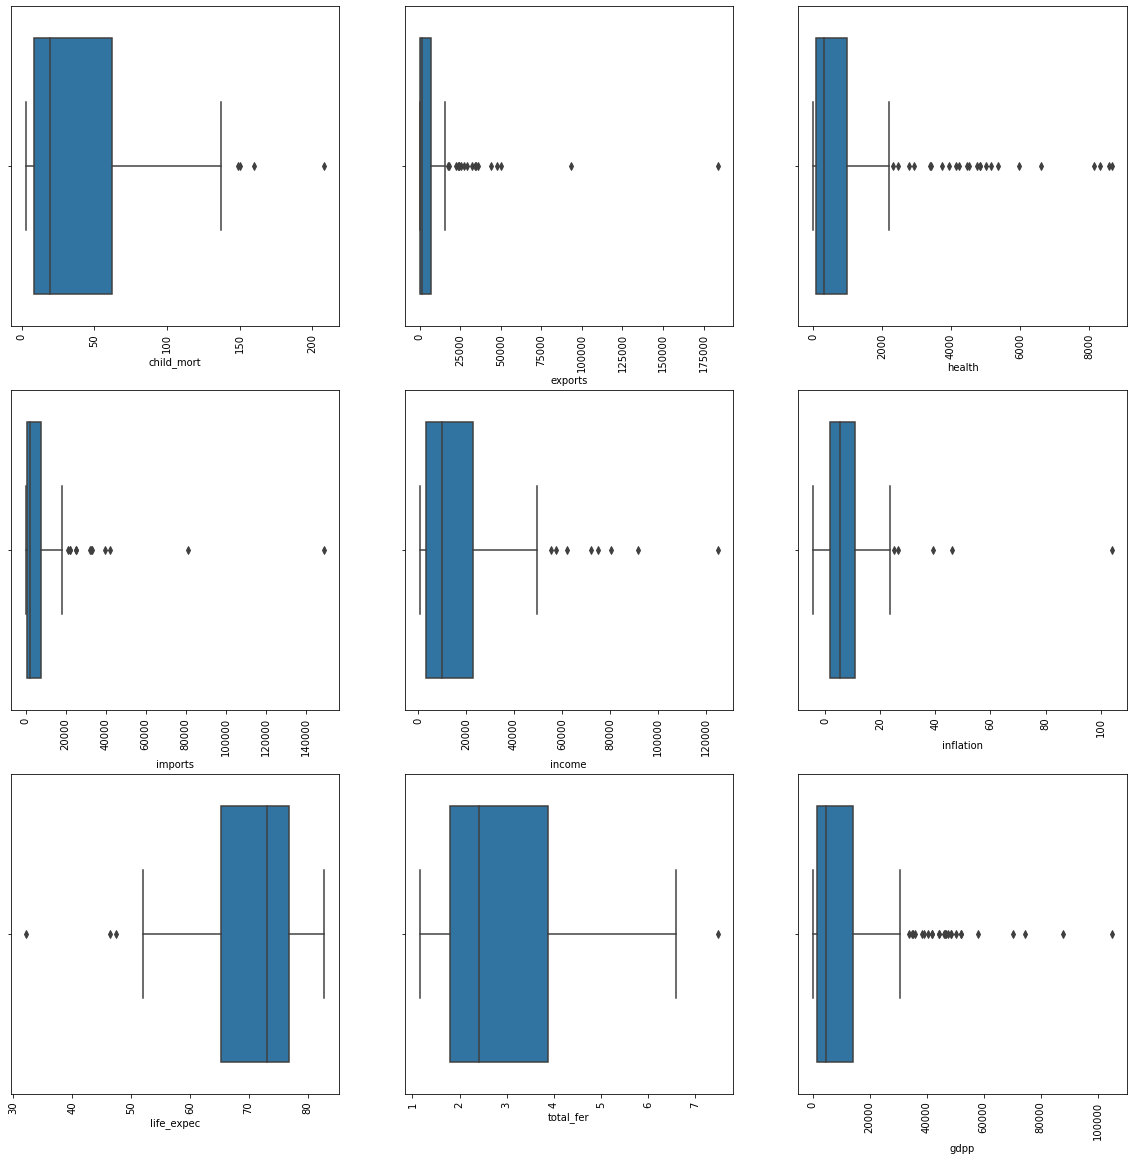

In [15]:
# Plotting boxplots for the columns to check outliers.

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='child_mort',data= country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.boxplot(x='exports',data= country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.boxplot(x='health',data= country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.boxplot(x='imports',data= country_data,)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x='income',data= country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x='inflation',data= country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x='life_expec',data= country_data,)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.boxplot(x='total_fer',data= country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.boxplot(x='gdpp',data= country_data)
plt.xticks(rotation=90)

plt.show()

There are outliers in each column.

In [16]:
# Creating a copy of the dataframe for further analysis.
country_data_df = country_data.copy()

In [17]:
'''Defining a function 'capping' which will handle the outliers.
This function will take 3 arguments dataframe, column_name, flag(1 or 0 for upper capping and lower capping respectively.)'''

def capping(df, col, flag):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    
    lower_cap= q1-1.5*iqr
    upper_cap= q3+1.5*iqr
    
    if flag == 1:
        df.loc[(df[col] > upper_cap), col] = upper_cap
    else:
        df.loc[(df[col] < lower_cap), col] = lower_cap

    return df

For columns such as 'child_mort', 'inflation', 'total_fer', removing lower range outliers only (lower capping).

For rest of the columns, removing upper range outliers only (upper capping).

In [18]:
country_data_df = capping(country_data_df, 'child_mort',0)
country_data_df = capping(country_data_df, 'inflation',0)
country_data_df = capping(country_data_df, 'total_fer',0)
country_data_df = capping(country_data_df, 'exports',1)
country_data_df = capping(country_data_df, 'health',1)
country_data_df = capping(country_data_df, 'imports',1)
country_data_df = capping(country_data_df, 'income',1)
country_data_df = capping(country_data_df, 'life_expec',1)
country_data_df = capping(country_data_df, 'gdpp',1)

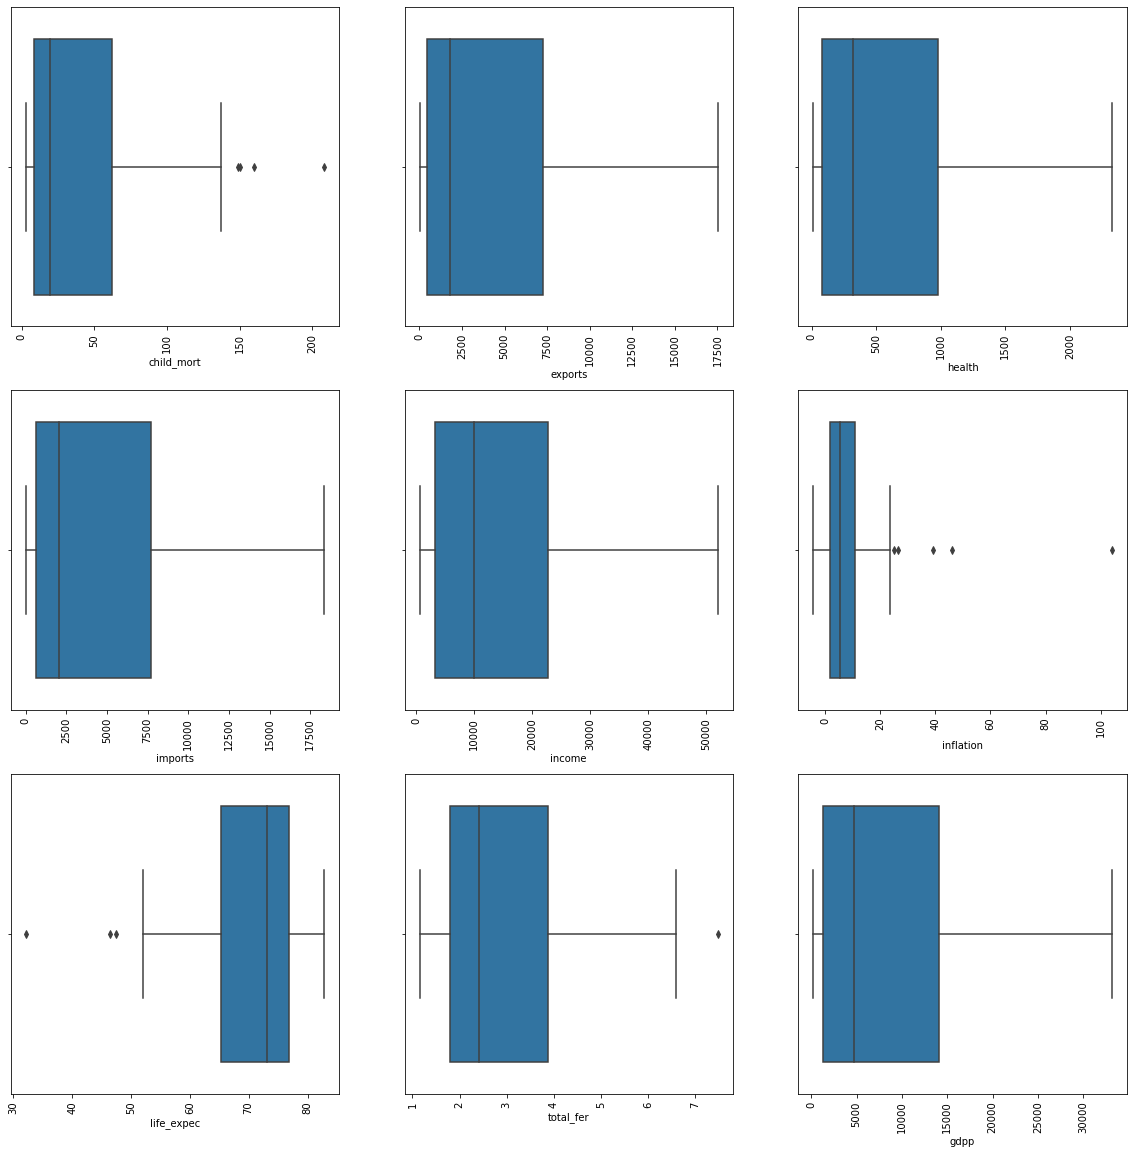

In [19]:
# Plotting boxplots for the columns to check outliers after outlier-treatment.
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='child_mort',data=country_data_df)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.boxplot(x='exports',data=country_data_df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.boxplot(x='health',data=country_data_df)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.boxplot(x='imports',data=country_data_df,)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x='income',data=country_data_df)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x='inflation',data=country_data_df)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x='life_expec',data=country_data_df,)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.boxplot(x='total_fer',data=country_data_df)
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.boxplot(x='gdpp',data=country_data_df)
plt.xticks(rotation=90)

plt.show()

As we can see, capping has been done sucessfully for respective columns and the outliers have been handled.

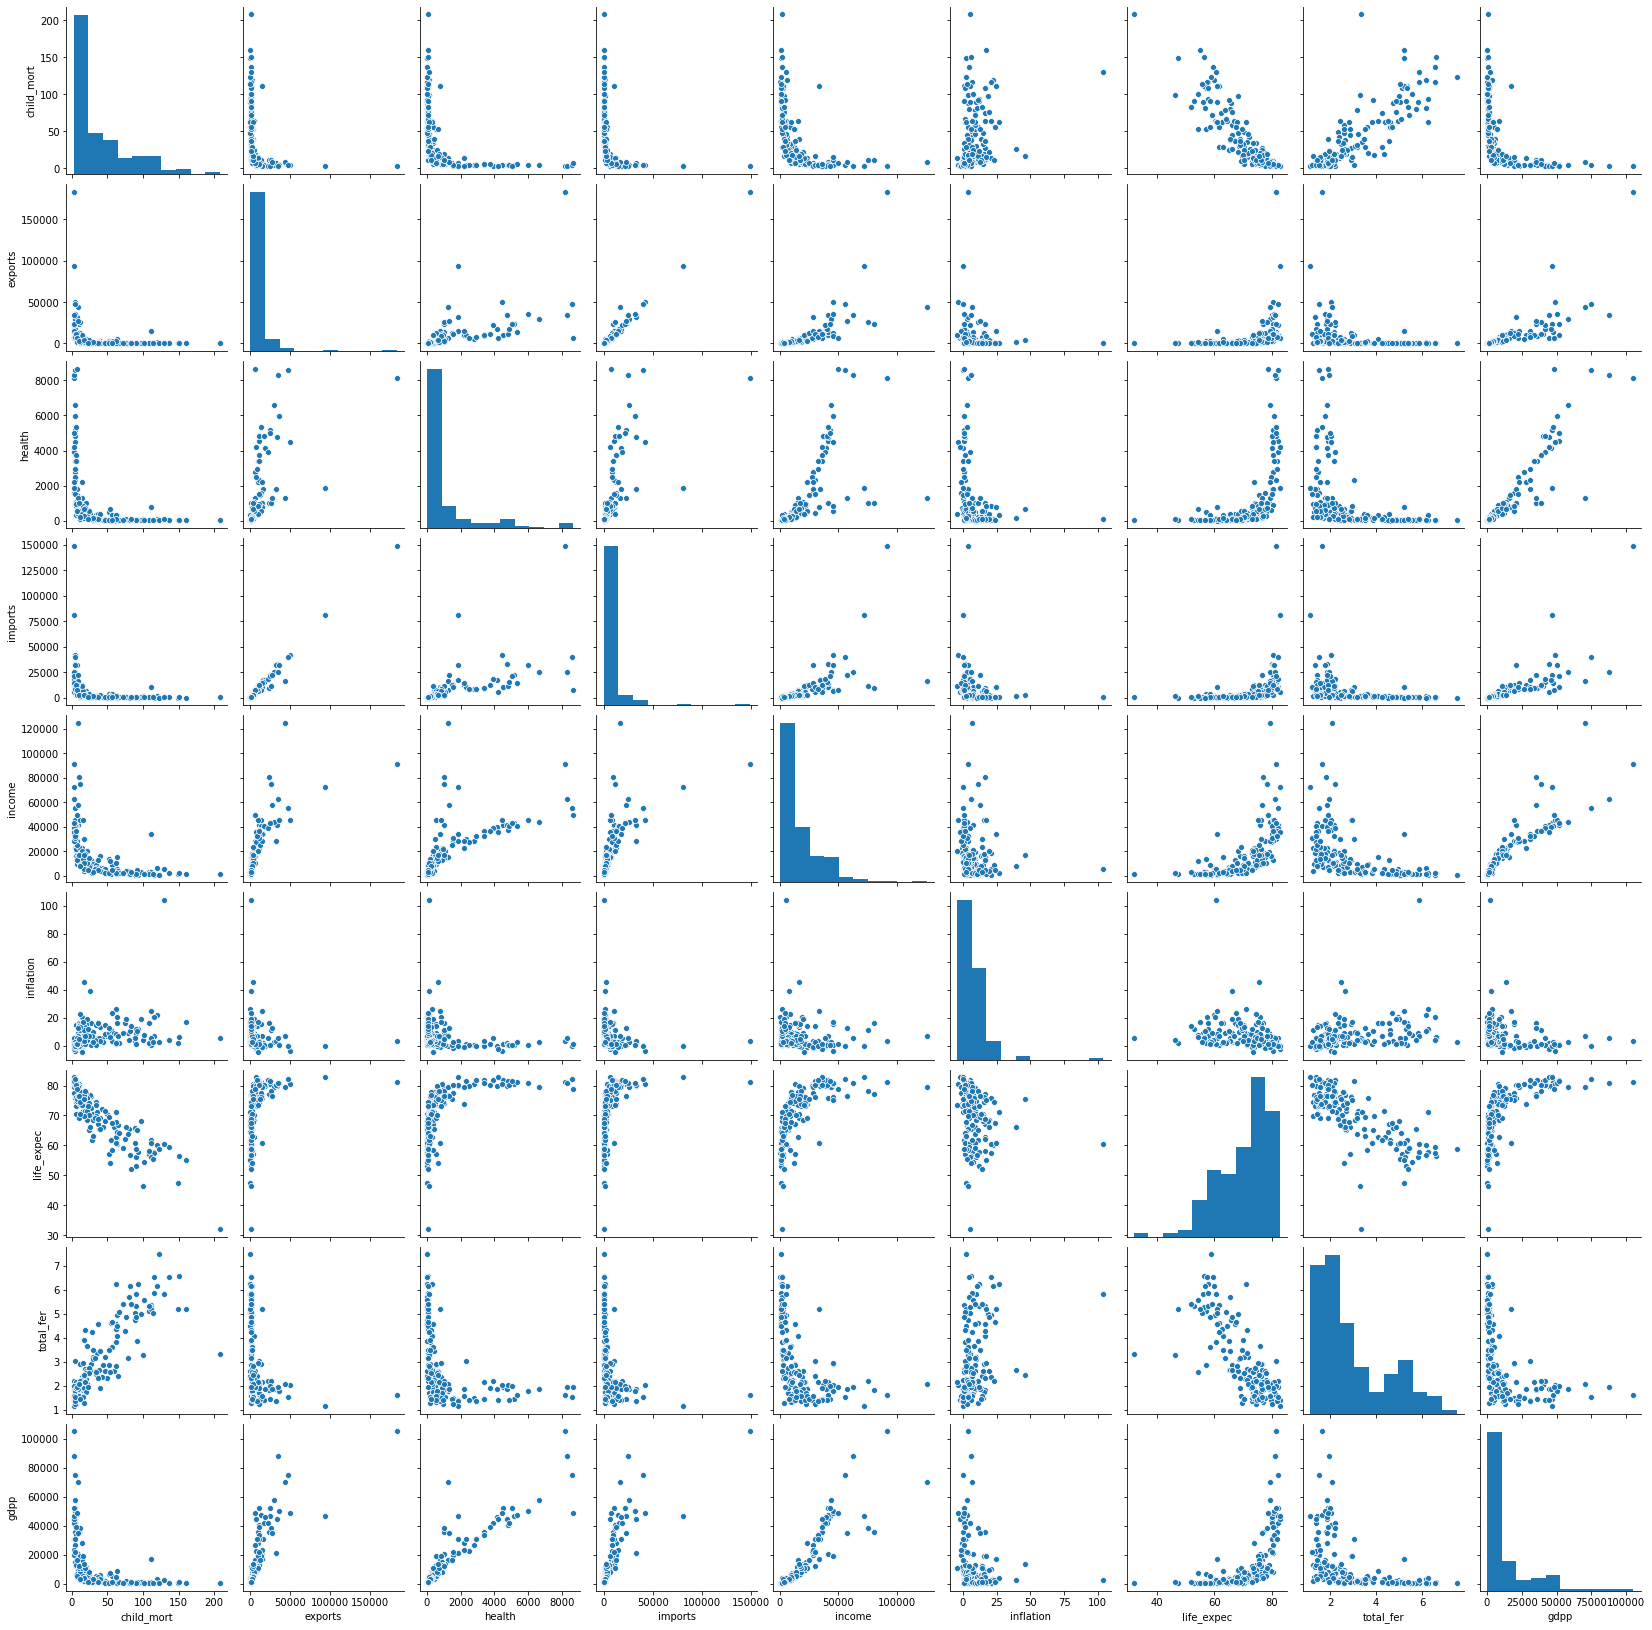

In [20]:
sns.pairplot(country_data)
plt.show()

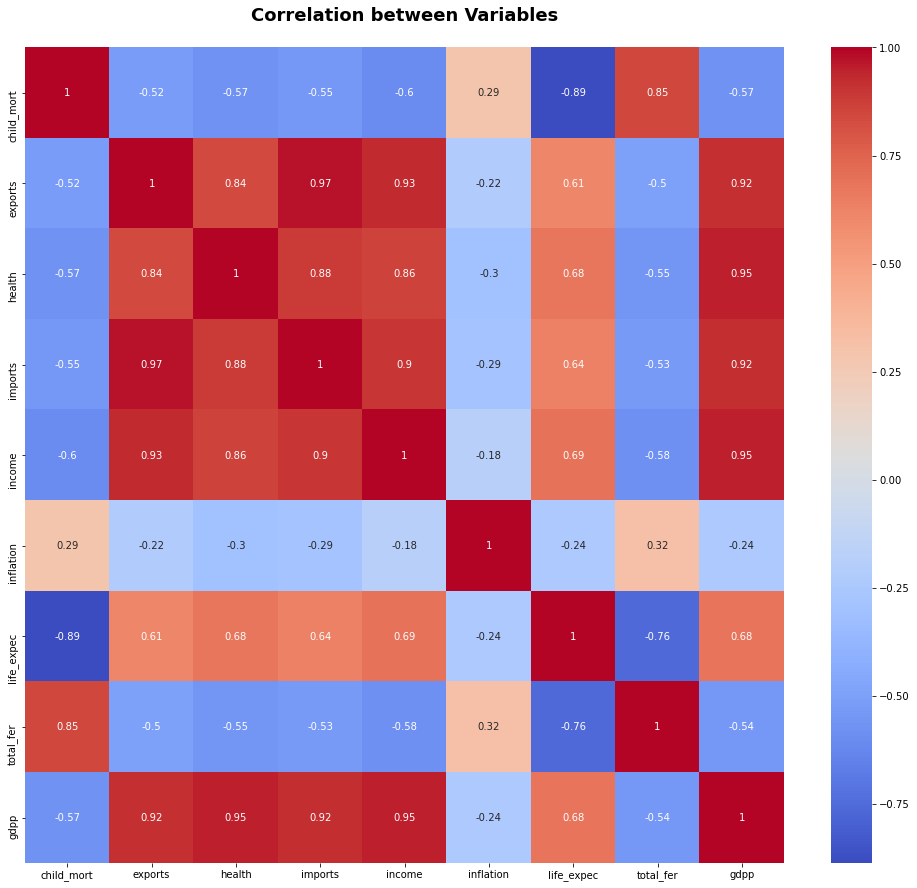

In [21]:
plt.figure(figsize=(17,15))
sns.heatmap(country_data_df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation between Variables\n",fontsize=18, fontweight='bold')
plt.show()

#### Inference:

#### The heatmap meets our expectations. We don't see any anomaly in the data pattern.
- High positive correlation between health, life_expec.
- High positive correlation between income, imports.
- High positive correlation between gdpp, exports.
- High negative correlation between child_mort, life_expec.
- Negative correlation between health, child_mort.

# Clustering
## Hopkins Test

In [22]:
# Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = no. of columns
    n = len(X)
    #n = no. of rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
h_score= hopkins(country_data_df.drop('country', axis = 1))

if h_score>0.70:
    print(h_score, ' is a good Hopkins score for Clustering.')

0.8954743696653403  is a good Hopkins score for Clustering.


## Scaling data

In [24]:
df_country = country_data_df.drop("country", axis=1)

scaler = StandardScaler()

country_data_scaled = scaler.fit_transform(df_country)
country_data_scaled

array([[ 1.29153238, -0.80056371, -0.79556251, ..., -1.61909203,
         1.90288227, -0.84634107],
       [-0.5389489 , -0.61314982, -0.51391972, ...,  0.64786643,
        -0.85997281, -0.54082746],
       [-0.27283273, -0.51557561, -0.6160104 , ...,  0.67042323,
        -0.0384044 , -0.50886816],
       ...,
       [-0.37231541, -0.64788476, -0.73612924, ...,  0.28695762,
        -0.66120626, -0.78095407],
       [ 0.44841668, -0.74249447, -0.76323195, ..., -0.34463279,
         1.14094382, -0.78095407],
       [ 1.11495062, -0.71718267, -0.7406285 , ..., -2.09278484,
         1.6246091 , -0.7679976 ]])

In [25]:
# converting to a pandas dataframe.
country_data_scaled = pd.DataFrame(country_data_scaled)
country_data_scaled.columns = ['child_mort', 'exports', 'health','imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
country_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.800564,-0.795563,-0.794660,-0.943936,0.157336,-1.619092,1.902882,-0.846341
1,-0.538949,-0.613150,-0.513920,-0.488076,-0.395181,-0.312347,0.647866,-0.859973,-0.540827
2,-0.272833,-0.515576,-0.616010,-0.591590,-0.199291,0.789274,0.670423,-0.038404,-0.508868
3,2.007808,-0.431911,-0.722418,-0.571509,-0.660984,1.387054,-1.179234,2.128151,-0.589198
4,-0.695634,0.144450,0.069070,0.428104,0.209637,-0.601749,0.704258,-0.541946,0.159686


Data is now scaled. Ready to be fed into the model.

# KMeans Clustering

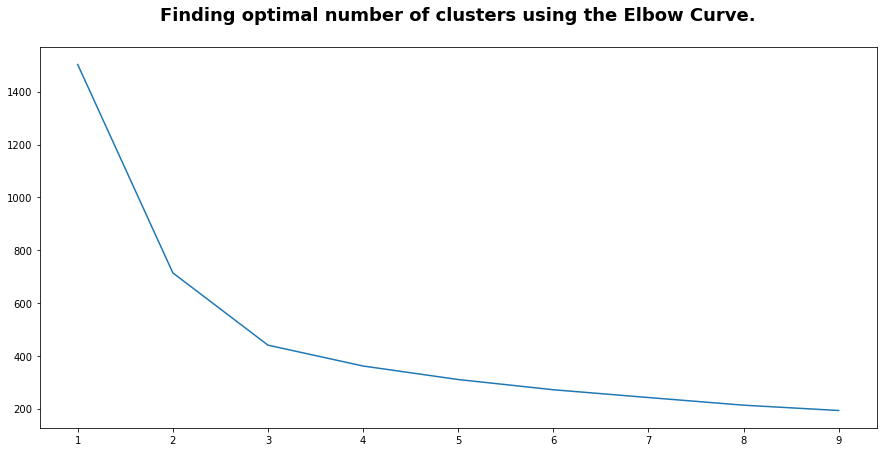

In [26]:
# Finding optimal number of clusters using the Elbow Curve.
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_data_scaled)
    ssd.append([k, model.inertia_])

plt.figure(figsize=(15,7))
plt.title("Finding optimal number of clusters using the Elbow Curve.\n",fontsize=18, fontweight='bold')
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

In [27]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters= num_clusters, max_iter= 50)
    kmeans.fit(country_data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_data_scaled, cluster_labels)
    print("For no. of clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For no. of clusters=2, the silhouette score is 0.5088446302766764
For no. of clusters=3, the silhouette score is 0.4559826878073939
For no. of clusters=4, the silhouette score is 0.4576552897958717
For no. of clusters=5, the silhouette score is 0.33636818919722
For no. of clusters=6, the silhouette score is 0.3146888860913566
For no. of clusters=7, the silhouette score is 0.3128558863153699
For no. of clusters=8, the silhouette score is 0.2960779309700565


From above it looks good to proceed with 3 clusters.

In [28]:
#K-means with k=4 clusters
kmeans = KMeans(n_clusters= 3, max_iter= 50, random_state=100)
kmeans.fit(country_data_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [29]:
# Cluster labels
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [30]:
# creating a new dataframe for KMeans modeling.
data_kmeans = pd.concat([country_data_df, pd.Series(kmeans.labels_)], axis = 1)
data_kmeans.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
data_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


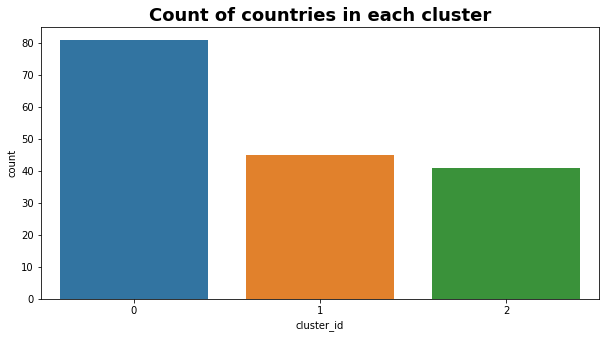

In [31]:
plt.figure(figsize=(10,5))
plt.title("Count of countries in each cluster",fontsize=18, fontweight='bold')
sns.countplot(data_kmeans.cluster_id)
plt.show()

Each cluster has a good amount of countries in it.

# KMeans Cluster Visualization

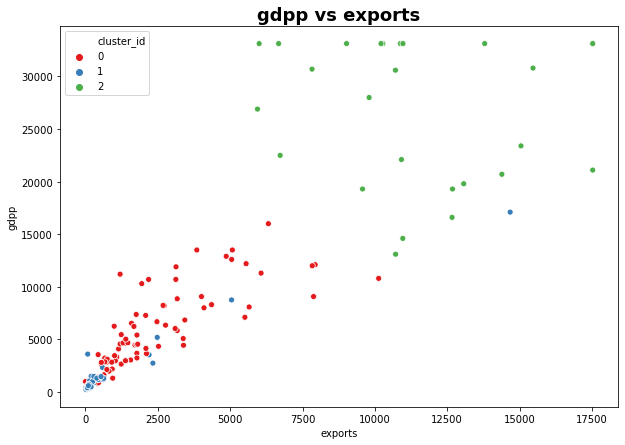

In [32]:
plt.figure(figsize=(10,7))
plt.title("gdpp vs exports",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data_kmeans, palette='Set1')
plt.show()

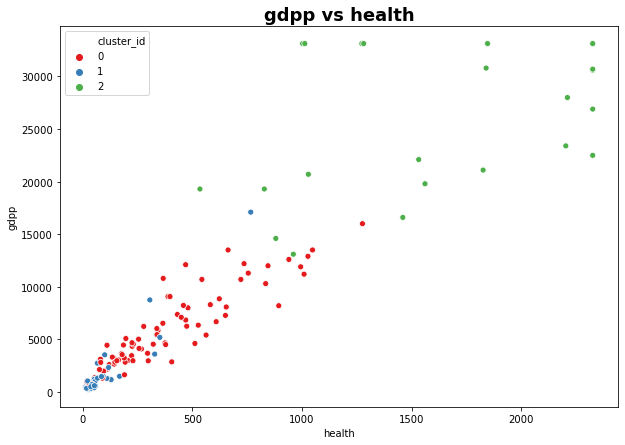

In [33]:
plt.figure(figsize=(10,7))
plt.title("gdpp vs health",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data_kmeans, palette='Set1')
plt.show()

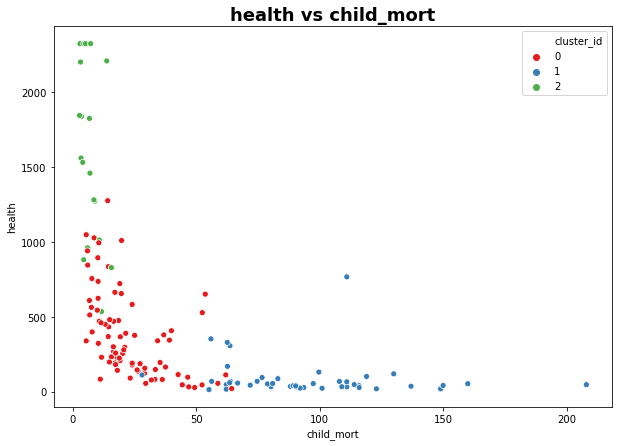

In [34]:
plt.figure(figsize=(10,7))
plt.title("health vs child_mort",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'child_mort', y = 'health', hue ='cluster_id', legend = 'full', data = data_kmeans, palette='Set1')
plt.show()

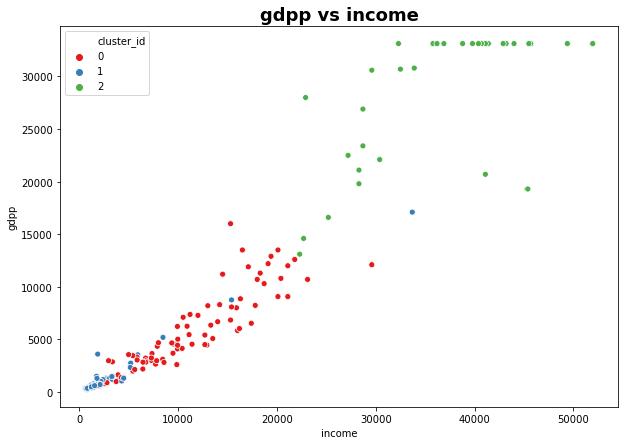

In [35]:
plt.figure(figsize=(10,7))
plt.title("gdpp vs income",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data_kmeans, palette='Set1')
plt.show()

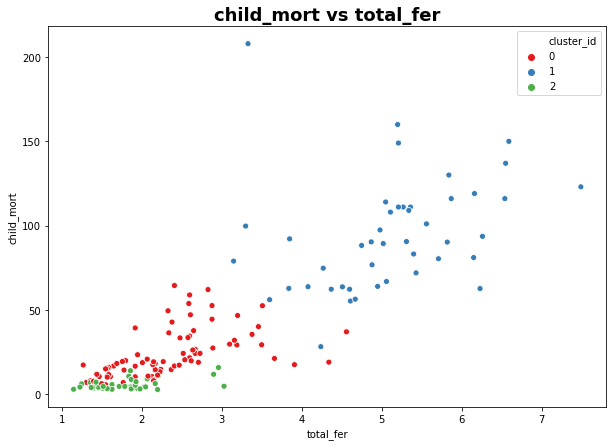

In [36]:
plt.figure(figsize=(10,7))
plt.title("child_mort vs total_fer",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'total_fer', y = 'child_mort', hue ='cluster_id', legend = 'full', data = data_kmeans, palette='Set1')
plt.show()

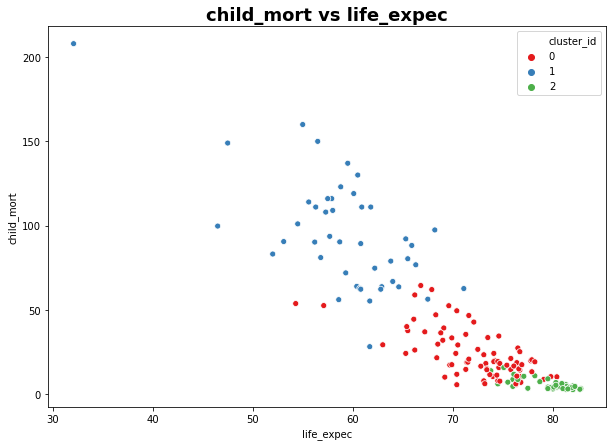

In [37]:
plt.figure(figsize=(10,7))
plt.title("child_mort vs life_expec",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_id', legend = 'full', data = data_kmeans, palette='Set1')
plt.show()

# KMeans Cluster Profiling

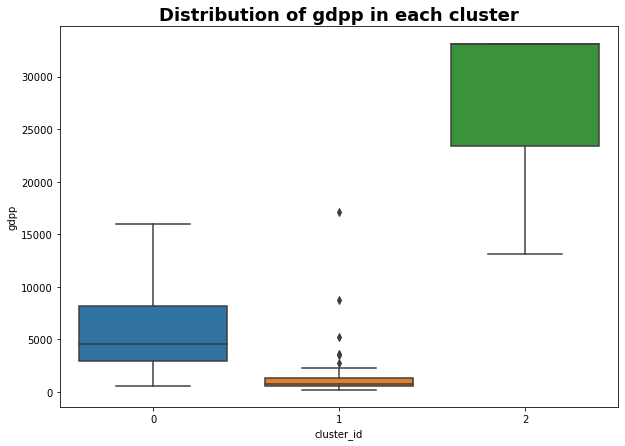

In [38]:
plt.figure(figsize=(10,7))
plt.title("Distribution of gdpp in each cluster",fontsize=18, fontweight='bold')
sns.boxplot(data=data_kmeans,x = 'cluster_id',y='gdpp')
plt.show()

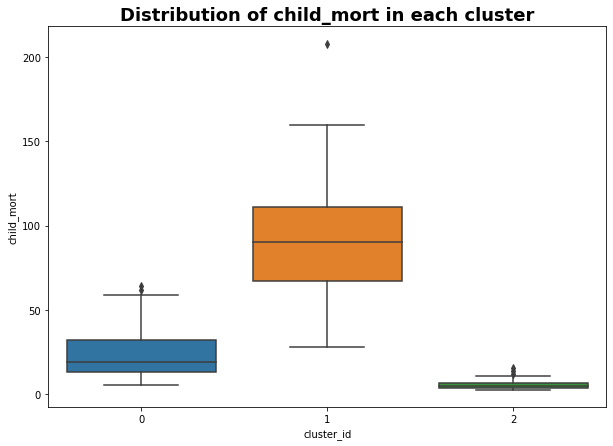

In [39]:
plt.figure(figsize=(10,7))
plt.title("Distribution of child_mort in each cluster",fontsize=18, fontweight='bold')
sns.boxplot(data=data_kmeans,x = 'cluster_id',y='child_mort')
plt.show()

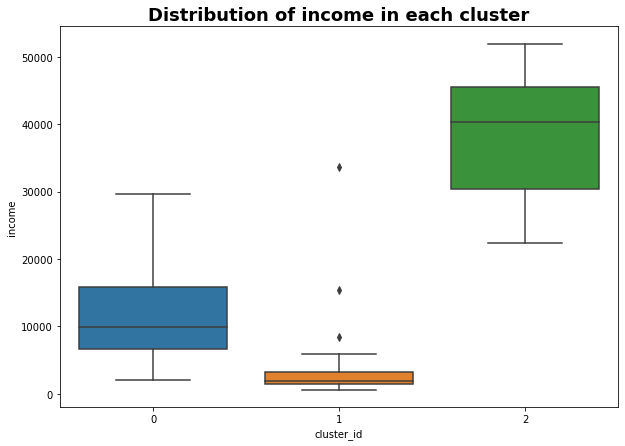

In [40]:
plt.figure(figsize=(10,7))
plt.title("Distribution of income in each cluster",fontsize=18, fontweight='bold')
sns.boxplot(data=data_kmeans,x = 'cluster_id',y='income')
plt.show()

#### Cluster_id 1 has very low income and gdpp and very high child mortality rate this cluster will be our focus as it clearly needs the most aid.

In [41]:
# listing all countries in cluster 1.
data_kmeans[data_kmeans['cluster_id']==1]['country']

0      Afghanistan             
3      Angola                  
17     Benin                   
25     Burkina Faso            
26     Burundi                 
28     Cameroon                
31     Central African Republic
32     Chad                    
36     Comoros                 
37     Congo, Dem. Rep.        
38     Congo, Rep.             
40     Cote d'Ivoire           
49     Equatorial Guinea       
50     Eritrea                 
55     Gabon                   
56     Gambia                  
59     Ghana                   
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
80     Kenya                   
81     Kiribati                
84     Lao                     
87     Lesotho                 
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
99     Mauritania              
106    Mozambique              
108    Namibia                 
112    N

In [42]:
# sorting countries in cluster 1 based on child_mort, income and gdpp sequencially.
top_kmeans = data_kmeans[data_kmeans['cluster_id']==1].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,1
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1
2,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,1
3,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1
4,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,1
5,Nigeria,130.0,589.490,118.1310,405.420,5150.0,104.00,60.5,5.84,2330.0,1
6,Niger,123.0,77.256,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
7,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
8,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
9,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.81,57.9,5.87,575.0,1


In [43]:
# Listing top 10 countires in need of aid.
top_10_k = top_kmeans.iloc[:10]
top_10_k['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


# Hierarchical Clustering

We will now perform Hierarchical Clustering on the dataset and see if we can get better clusters or do the results of both clustering concur.

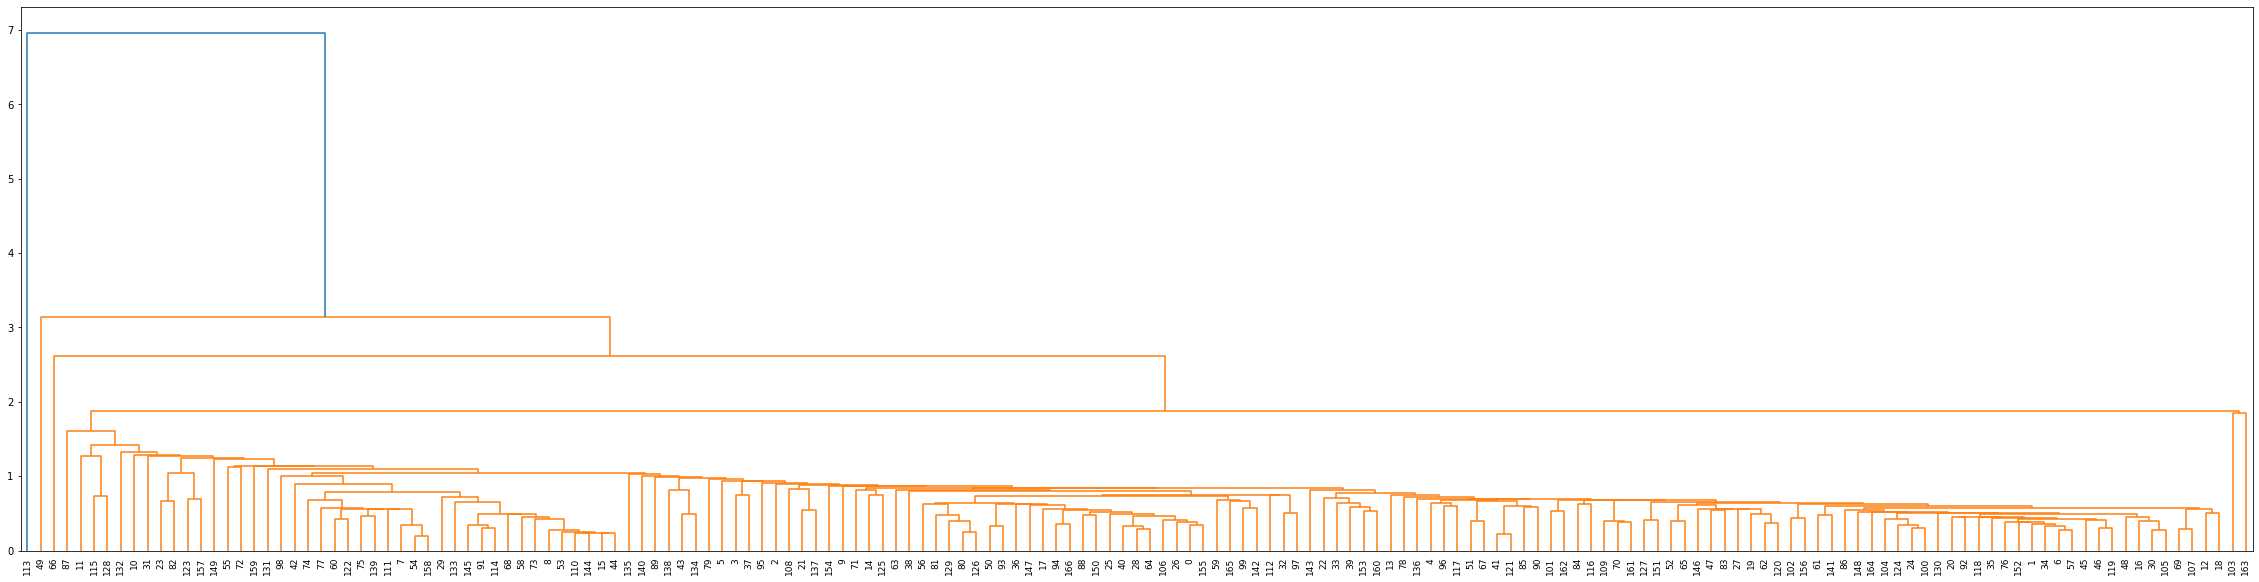

In [44]:
#single linkage
plt.figure(figsize=(40,10))
mergings_single = linkage(country_data_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.xticks(fontsize= 9)
plt.show()

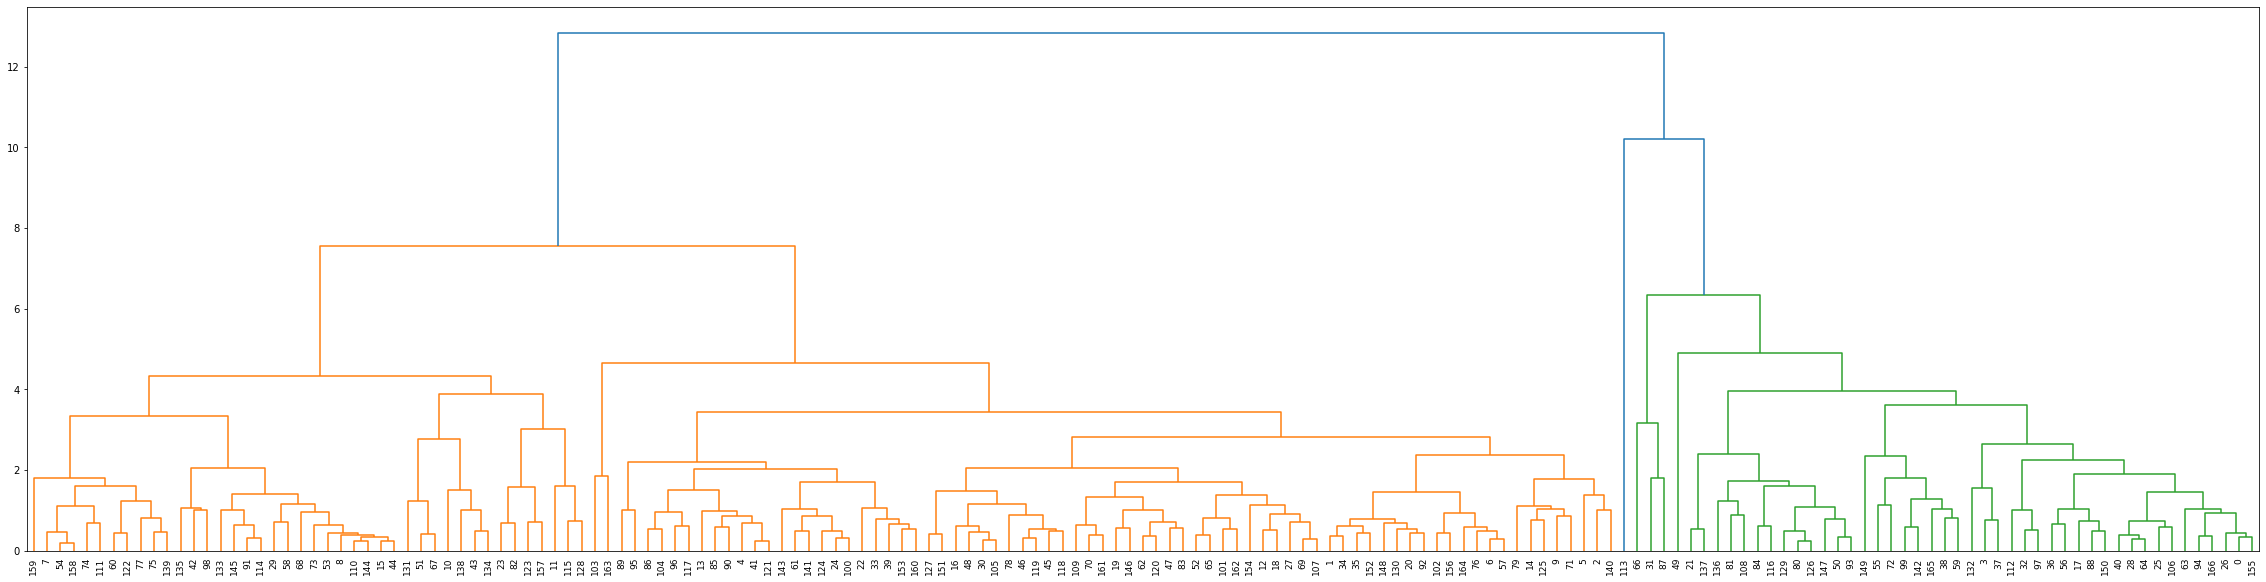

In [45]:
#complete linkage
plt.figure(figsize=(40,10))
mergings_complete = linkage(country_data_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.xticks(fontsize= 9)
plt.show()

Single linkage is not interpretable so we will go with complete linkage model.<br>
Looking at dendrogram of hierarchical clustering there seem to be 3 clusters.

In [46]:
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [47]:
data_hierarchical = pd.concat([country_data_df, pd.Series(cluster_labels)], axis = 1)
data_hierarchical.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
data_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [48]:
# Count of countries in each cluster.
data_hierarchical['cluster_labels'].value_counts()

1    119
0    47 
2    1  
Name: cluster_labels, dtype: int64

One of the cluster has only 1 country. Increasing the cluster count and rechecking...

In [49]:
cluster_labels = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
data_hierarchical = pd.concat([country_data_df, pd.Series(cluster_labels)], axis = 1)
data_hierarchical.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
data_hierarchical['cluster_labels'].value_counts()

1    77
0    47
2    42
3    1 
Name: cluster_labels, dtype: int64

#### Inference: 

We still get a cluster with 1 country. Clearly, this country standouts in a separate cluster in terms of need of aid (extreme).
<br>
Let's check more in detail with help of plots.

# Heirarchical Clusters Visualization

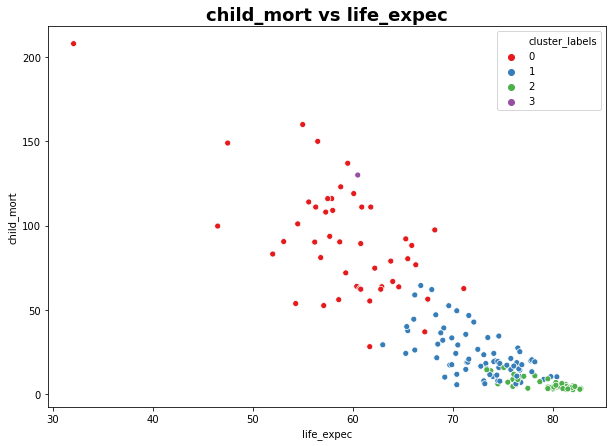

In [50]:
plt.figure(figsize=(10,7))
plt.title("child_mort vs life_expec",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = data_hierarchical, palette='Set1')
plt.show()

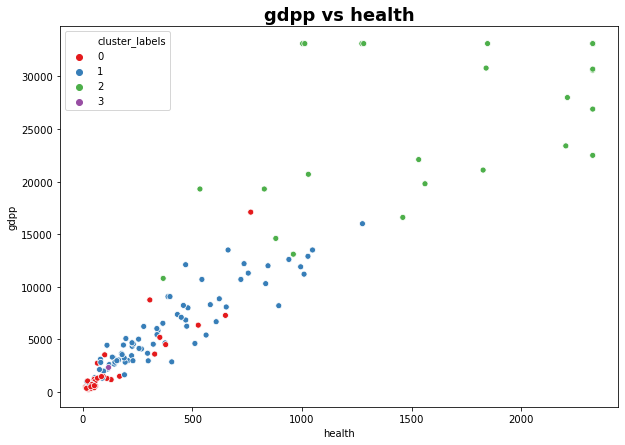

In [51]:
plt.figure(figsize=(10,7))
plt.title("gdpp vs health",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = data_hierarchical, palette='Set1')
plt.show()

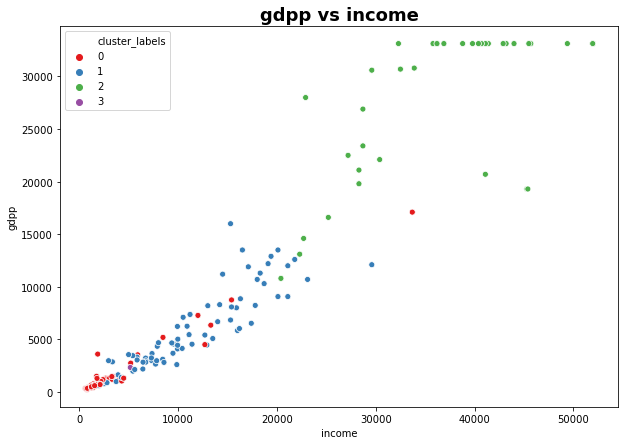

In [52]:
plt.figure(figsize=(10,7))
plt.title("gdpp vs income",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = data_hierarchical, palette='Set1')
plt.show()

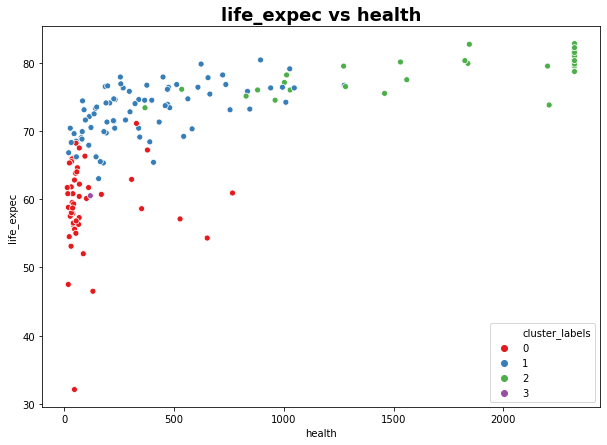

In [53]:
plt.figure(figsize=(10,7))
plt.title("life_expec vs health",fontsize=18, fontweight='bold')
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = data_hierarchical, palette='Set1')
plt.show()

# Hierarchical Cluster Profiling

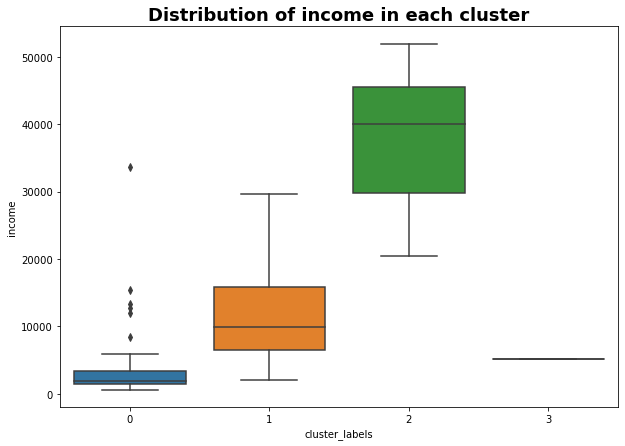

In [54]:
plt.figure(figsize=(10,7))
plt.title("Distribution of income in each cluster",fontsize=18, fontweight='bold')
sns.boxplot(data= data_hierarchical,x = 'cluster_labels',y='income')
plt.show()

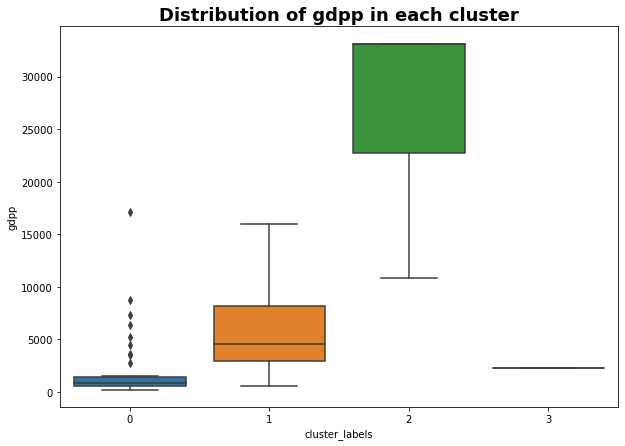

In [55]:
plt.figure(figsize=(10,7))
plt.title("Distribution of gdpp in each cluster",fontsize=18, fontweight='bold')
sns.boxplot(data= data_hierarchical,x = 'cluster_labels',y='gdpp')
plt.show()

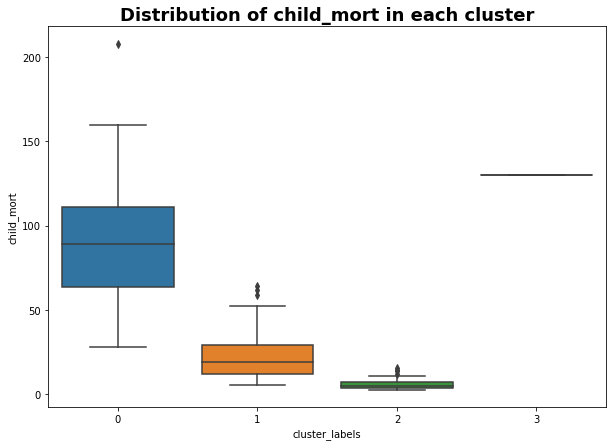

In [56]:
plt.figure(figsize=(10,7))
plt.title("Distribution of child_mort in each cluster",fontsize=18, fontweight='bold')
sns.boxplot(data= data_hierarchical,x = 'cluster_labels',y='child_mort')
plt.show()

#### Inference:
- Countries in cluster 0 have low income, low gdpp and high child_mort rate.
- Country in cluster 3 appears to be in severe need of aid.

<br><br>
Checking country in desperate need of aid...

In [57]:
data_hierarchical[data_hierarchical['cluster_labels']==3]['country']


113    Nigeria
Name: country, dtype: object

Checking top 10 coutries in need of aid in cluster 0.

In [58]:
top_h = data_hierarchical[data_hierarchical['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,0
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
2,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,0
3,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
4,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,0
5,Niger,123.0,77.256,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
6,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
7,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
8,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.81,57.9,5.87,575.0,0
9,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,0


In [59]:
top_10_h = top_h.iloc[:10]
top_10_h['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Niger
6,Angola
7,"Congo, Dem. Rep."
8,Burkina Faso
9,Guinea-Bissau


# Conclusion

- Both KMeans clustering and Hierarchical Clustering shows the same list of countries that are in need of aid.<br>
- As per Hierarchical Clustering, Nigeria seems to be in dire need of aid. And this must be looked into.

Hence, the countries in need of aid are:
- Nigeria
- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Niger
- Angola
- Congo, Dem. Rep.
- Burkina Faso